<img src="https://github.com/colmhiggs11/Machine_Learning_21_CH/blob/main/Images/scipylogo.png?raw=true" style = "height:125px;width:300px;" Title= "SciPy Sub Packages"/>


---

# SciPy
---

Scipy is a Python library used to solve mathematical and scientific problems. It is built on Numpy. Numpy uses array data and has basic operation like sorting and indexing. SciPy contains numerical code. It is a library containing full versions of mathematical and scientific functions. The sub packages contained in SciPy are shown in the image below. In this notebook we will be looking at SciPy Stats.

<img src="https://github.com/colmhiggs11/Machine_Learning_21_CH/blob/main/Images/Scipy.png?raw=true" style = "height:400px;width:550px;" Title= "SciPy Sub Packages"/>


In [1]:
## Importing Libraries
import scipy
from scipy import stats
import numpy as np 
import pandas as pd 
import seaborn as sns  
import matplotlib.pyplot as plt
import pingouin as pg
%matplotlib inline


# SciPy Stats
---

The SciPy Stats module is one of the many sub packages of the SciPy library. It is made up of probability distributions (both continuous and discrete), summary and frequency statistics, correlation functions and statistical tests,kernel density estimation and a lot more. It's content is constantly being updated due to the open source nature of SciPy. SciPy has many contributors and is located on Github. [[1]](#1) 

The two distribution classes rv_continuous and rv_discrete are made for subclassing. They are normally used if you need a distribution which is not already defined in scipy.stats There are more than 80 continuous random variables and over 10 discrete random variables implemented into these classes.	To get a full list of the statistic functions in scipy.stats you can use the following code: `info(stats) `

Probability distributions show us the Likelihood of a particular outcome. 
The are underneath the curve must add up to 1 as shown below. [[2]](#2) 


<img src="https://github.com/colmhiggs11/Machine_Learning_21_CH/blob/main/Images/PDF.PNG?raw=true" style = "height:300px;width:500px;" Title= "Normality"/>


__Continuous distributions__
Typically use continuous random variables such as measurements. Examples include height, the time required to complete a task etc.
This is represented by the area under a curve or the integral. 

__Discrete distributions__
Typically use discrete random variables such as count values . Examples of discrete random variables include the number of pets you own, attendance at a school, the number of patients in a hospital.
The probability distribution is a list of probabilities associated with each of its possible values. It is called probability mass function.

There are a number of other functions within scipy.stats that are very useful.

|Name| Description|
|:-------------|:-------------|
|Summary statistics |Used to return descriptive statistics. For decoding values in the output. Minimum, Maximum, Count, Mean etc.|
|Frequency statistics   |Typically used to return scores and frequency histograms|
|Correlation functions - f_oneway(args[, axis]) Perform one-way ANOVA. |Used to analyse correlation between variables or features in datasets. For quantifying the strength of the relationship |
|Statistical tests |Used in hypothesis testing to determine whether input variables have significant relationship with the target variables. Estimation of difference between two or more groups.| 

In Statistical tests there is an assumption made and the testing is based onhow likely the assumption will prove to be false. Initially a null hypothesis is assumed which means there is no difference or relationship between variables. The p-probability value deternines whether there is a significant relationship between the input and target variables. If the p-value is below th threshold typically 0.05. Then there is said to be a relationship between the variables. For the purpose of this notebook we will be focussing on the ANOVA statistical test.

# ANOVA (ANalysis Of VAriance)
----



ANOVA is a statistical test as mentioned above. It is typically used when a t-test that would deal with two samples is not able to be used because there are more than two samples to be tested.
Anova uses the F-Test to check whether the group means are equal and also looks for the variation within the samples. There is only one dependent variable in the model. The formula for completing a one-way ANOVA test is as follows:  https://www.ics.uci.edu/~jutts/8/Lecture28Compact.pdf

___
$$
F = \frac{Explained \; Variance}{Unexplained\; Variance} or\frac{ Variance\; between \;Groups}{ Variance \;within \;Groups} = \frac{Sum \;of \;Squares\; between\; groups}{Sum \;of \;Squares\; for \;error} = \frac{MST}{MSE} = \frac{Mean \;Squared \;Error \;Treatments}{Mean \;Squared \;Error } = \frac{\frac{SS_B}{DfT}}{\frac{SS_W}{DfE}} = \frac{\frac{SS_B}{k-1}}{\frac{SS_W}{N-k}}
$$


---

$$ Where,$$


$$SS_b = \sum_{i}^{} n_i{(y_i-y)^2}$$

$$SS_bW = \sum_{ij}^{} {(y_{ij}-y_i)^2}$$

$$ Where,$$


$$y_i = Sample \;mean \;in \;the\; i^{th} \;group$$

$$n_i = number \;of \;observation \;in\; the \;i^{th}\; group$$

$$y_i = total\; mean \;of \;the \;data$$

$$k = total \;number \;of \;groups$$

$$y_{ij} = j^{th} \;observation\; out \;of \;k \;group$$

$$N = Overall\; sample\; size$$


### Initially we look at the ANOVA hypotheses:


|Name| formula |Description|
|:-------------|:-------------|:-------------|
|Null hypothesis |$$H_0:  = \mu_1 = \mu_2...=\mu_p$$|This is where there is no variation between the mean values in the groups|
|Alternative hypothesis   |$$H_0:  All \; \mu \;are  \;not  \;equal$$ |This is where at least one of the groups mean value differs from the other groups|


### Next we look at the ANOVA assumptions: 

|Title| Description |
|:-------------|:-------------|
|1. The dependent variable must be continuous  |Has to be a measured value. Eg(Test scores(0-100%), Weight(kg), Height(m) etc.|
|2. The independent variables must consist of 2/3 categorical independent groups  |One-way ANOVA is used normally when there are more than two categorical,independent groups Eg(salary range(Low,Medium,High), ethnicity(Caucasian, Hispanic, African, African-American) etc.|
|3. Must be no relationship between observations  |To use the One-wa Anova test no single observation in a group can be part of another group. |
|4. There should be no significant outliers  |Outliers that don't follow the typical pattern within the data and have values that largely differ from the mean reduce the validity and accuracy of the Anova one-way test.|
|5. Dependent variable should be normally distributed for each category  |Shapiro-Wilk test is used here to test for normality.|
|6. There needs to be homogeneity of variances |Levene's test for homogeneity of variances is used here. If this test fails (p-value of lower than 0.05) then a Welch Anova test is required instead of a one-way Anova|
[[3]](#3)

## Dataset 
The dataset that will be used in this ANOVA testing is the Student Performance dataset that looks into the highest level of education received by the parents and what effect is has on the childs Math, Reading and Writing score. The dataset also looks at ethnicity, the types of lunch received and gender. The dataset used can be found at the following location - https://www.kaggle.com/barkhaverma/student-performance-analysis. There are 1000 observations in the dataset, the first thing to do is to check that no data is missing. As seen below there is no missing data. We are going to be looking at the effect that the parents eduction has on the child's mathematical ability so we need to see how many categories we have in this group. 

In [2]:
## Creating Dataframe from CSV
df = pd.read_csv("Data/StudentPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
# Checking if there are any null values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

---
## Assumption 1 The dependent variable must be continuous
---

The dependent variable in this case will be the math score. Math scores in America were below average according to the PISA results [[4]](#4)so this is the score that we will be focusing on. As the is a score from 0-100, this is seen as a continuous variable and passes assumption 1. 

In [4]:
df['math score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math score, dtype: float64

---
## Assumption 2 The independent variables must consist of 2/3 categorical independent groups
---

To check this we check the number of unique values in the Parent_Eduction column. (Name changed for ease of use). As we can see below there are 6 unique values.
The values in this dataset look to have some crossover. There are two sets of columns that have similar identifiable names. For the purpose of this analysis both "some college" and "some high school" will be remove as they are covered in the various degree's and high school categories.

In [5]:
## Changing name of columns
New_DF_Math = df.rename({'parental level of education': 'Parent_Education'}, axis=1)  # new method

# Finding number of unique values
Num_unique = New_DF_Math.Parent_Education.nunique()

print(f'There are {Num_unique} categorical groups in this variable')
print(f'These are:\n{New_DF_Math.Parent_Education.value_counts()} categorical groups in this variable')

There are 6 categorical groups in this variable
These are:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: Parent_Education, dtype: int64 categorical groups in this variable


In [6]:
# Drop unused columns
drop_cols = ['gender', 'race/ethnicity', 'lunch', 'test preparation course', 'reading score',
       'writing score']

Anova_DF = New_DF_Math.drop(drop_cols, axis = 1)
Anova_DF.head()

,Parent_Education,math score
0,bachelor's degree,72
1,some college,69
2,master's degree,90
3,associate's degree,47
4,some college,76


In [7]:
df_HS = Anova_DF[Anova_DF['Parent_Education'] == "high school"]
df1 = Anova_DF[Anova_DF['Parent_Education'] == "some high school"]

a = df_HS.describe().T
b = df1.describe().T
print(f'{a}\n {b}')

            count       mean        std  min    25%   50%   75%   max
math score  196.0  62.137755  14.539651  8.0  53.75  63.0  72.0  99.0
             count       mean        std  min   25%   50%   75%   max
math score  179.0  63.497207  15.927989  0.0  53.0  65.0  74.0  97.0


In [8]:
## Reomving more columns
Anova_df1 = Anova_DF[~Anova_DF['Parent_Education'].isin(['some high school','some college'])]
Anova_df1.Parent_Education.value_counts()
print(f'There are now {Anova_df1.Parent_Education.nunique()} categorical groups in this variable')
print(f'---------------------------')
print(Anova_df1.Parent_Education.value_counts())
print(f'---------------------------')

There are now 4 categorical groups in this variable
---------------------------
associate's degree    222
high school           196
bachelor's degree     118
master's degree        59
Name: Parent_Education, dtype: int64
---------------------------


---
## Assumption 3 Must be no relationship between observations
---

The third assumption requires us to separate each of the categorical values into their own dataframe to ensure no one group is part of another group.

In [9]:
## Creating DF's for each category
df_HS = Anova_DF[Anova_DF['Parent_Education'] == "high school"]
df_AD = Anova_DF[Anova_DF['Parent_Education'] == "associate's degree"]
df_BD = Anova_DF[Anova_DF['Parent_Education'] == "bachelor's degree"]
df_MD = Anova_DF[Anova_DF['Parent_Education'] == "master's degree"]

---
## Assumption 4 There should be no significant outliers
---

Firstly we plot the groups on histograms to see if there are any glaringly obvious outliers. From the histogram it looks like there may be one in the High School group. The boxplots below show us that there is an outlier in this data.[[5]](#5) 

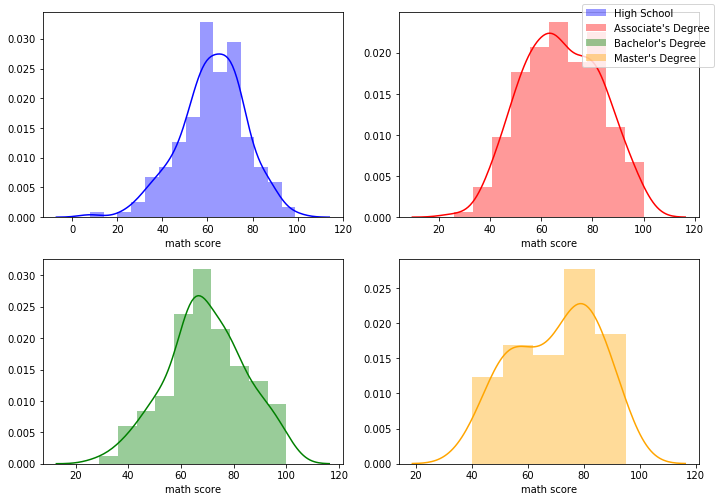

In [10]:
## Distribution plot for visualisation

fig, ax = plt.subplots(2, 2, figsize=(10, 7))

sns.distplot(df_HS["math score"], kde=True, rug=False, ax=ax[0, 0], color="b")
sns.distplot(df_AD["math score"], kde=True, rug=False, ax=ax[0, 1], color="r")
sns.distplot(df_BD["math score"], kde=True, rug=False, ax=ax[1, 0], color="g")
sns.distplot(df_MD["math score"], kde=True, rug=False, ax=ax[1, 1], color="orange")

fig.legend(labels=['High School','Associate\'s Degree','Bachelor\'s Degree','Master\'s Degree'])
plt.tight_layout()

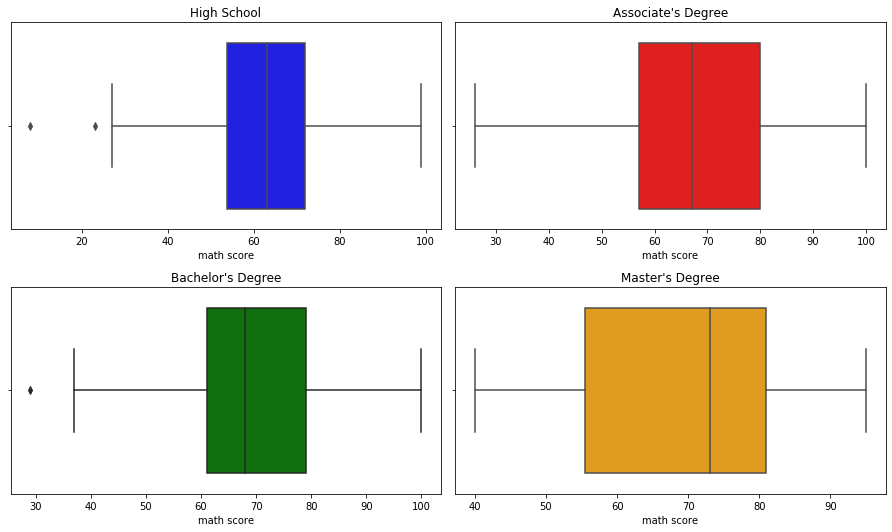

In [11]:
fig, ax = plt.subplots(2, 2, figsize=(12.5, 7.5))
       
ax1 =sns.boxplot(df_HS["math score"],ax=ax[0, 0],color="b")
ax2 =sns.boxplot(df_AD["math score"],ax=ax[0, 1],color="r")
ax3 = sns.boxplot(df_BD["math score"],ax=ax[1, 0],color="g")
ax4 = sns.boxplot(df_MD["math score"],ax=ax[1, 1],color="orange")

# https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib
ax1.title.set_text('High School')
ax2.title.set_text('Associate\'s Degree')
ax3.title.set_text('Bachelor\'s Degree')
ax4.title.set_text('Master\'s Degree')
plt.tight_layout()

df_list = [df_HS, df_AD, df_BD, df_MD]

In [12]:
# https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
#https://www.statisticshowto.com/probability-and-statistics/z-score/ 
for i in range(len(df_list)):
    z = np.abs(stats.zscore(df_list[i]["math score"]))
    print(f'Less than -3 std: {np.where(z < -3)}  | Greater than 3 std:{np.where(z > 3)}')

print("\nThe value that is identified as an outlier is:")
print(f'--------------------------------\n{df_HS.iloc[190]}')
print("--------------------------------")

# https://stackoverflow.com/questions/28679930/how-to-drop-rows-from-pandas-data-frame-that-contains-a-particular-string-in-a-p
df_HS1 = df_HS[~df_HS['math score'].isin(['8'])]


Less than -3 std: (array([], dtype=int64),)  | Greater than 3 std:(array([190], dtype=int64),)
Less than -3 std: (array([], dtype=int64),)  | Greater than 3 std:(array([], dtype=int64),)
Less than -3 std: (array([], dtype=int64),)  | Greater than 3 std:(array([], dtype=int64),)
Less than -3 std: (array([], dtype=int64),)  | Greater than 3 std:(array([], dtype=int64),)

The value that is identified as an outlier is:
--------------------------------
Parent_Education    high school
math score                    8
Name: 980, dtype: object
--------------------------------


The outlier is identified above and is removed from the dataset as shown above using the Z-score test that says an observation is an outlier when it is more than 3 times the standard deviation. 

---
## Assumption 5 Dependent variable should be normally distributed for each category
---

The Shapiro-Wilk test [[6]](#6) is completed to determine if the dependent variable is normally distributed for each category. When the P-value is greater than 0.05 the data to be normally distributed. As shown below the data for the High School & Masters Degree categories are normally distributed. The other two categories are just under the threshold for being a normally distributed category. 

In [13]:
## Looping through the DF's to complete Shapiro Wilk's tests
df_list1 = [df_HS1, df_AD, df_BD, df_MD]
labels=['High School','Associate\'s Degree','Bachelor\'s Degree','Master\'s Degree']
for i in range(len(df_list1)):
    for j in range(len(labels)):
        pvalue = stats.shapiro(df_list[i]['math score'])[1]
    print(f'Shapiro Wilk test for {labels[j]} - p value: {pvalue:.3f}: Index{[i]}')
    if pvalue<0.05:
        print("Data is **NOT** Normally distributed")
    else:
        print("Data is Normally distributed!!")

Shapiro Wilk test for Master's Degree - p value: 0.065: Index[0]
Data is Normally distributed!!
Shapiro Wilk test for Master's Degree - p value: 0.045: Index[1]
Data is **NOT** Normally distributed
Shapiro Wilk test for Master's Degree - p value: 0.604: Index[2]
Data is Normally distributed!!
Shapiro Wilk test for Master's Degree - p value: 0.032: Index[3]
Data is **NOT** Normally distributed


---
## Assumption 6 There needs to be homogeneity of variances
---
Levene test is used on the two Normally distributed categories to see if there is homogeneity of variances between them.
As seen below there is so the ANOVA f_oneway test can commence. Although with only two categories a t-test could also be performed.

In [14]:
## Levene tests for homogeneity of variances
pvaluea = stats.levene(df_list1[0]['math score'], df_list1[2]['math score'])
print(f'High School & Bachelor\'s Degree: \n{pvaluea}')
print(f'-----------------------------------------------------------------')
if pvaluea[1]<0.05:
    print(f'There is no homogeneity of variances as p-value is less than 0.05')
else:
    print(f'There is homogeneity of variances as p-value is greater than 0.05')
    print('-----------------------------------------------------------------')

High School & Bachelor's Degree: 
LeveneResult(statistic=0.22829941361553233, pvalue=0.6331222413836735)
-----------------------------------------------------------------
There is homogeneity of variances as p-value is greater than 0.05
-----------------------------------------------------------------


---
## ANOVA Test f_oneway - Test for significant difference
---

Test to see if there is significant difference between categories. Similar to other tests a p-value less than 0.05 would indicate that there is a significant difference. Whereas a value greater than 0.05 would indicate no significant difference. As shown below, there is a fairly significant difference as the p-value came out to be 0.00003. [[7]](#7)

In [15]:
## Anova oneway test
pvalue1 = stats.f_oneway(df_list1[0]['math score'], df_list1[2]['math score'])
print(f'High School & Bachelor\'s Degree: \n{pvalue1}')
print(f'-------------------------------------------------------------------------------------')
print(f'Anova test: Groups are significantly different as p-value ({pvalue1[1]:.5f}) is less than 0.05')
print('-------------------------------------------------------------------------------------')

High School & Bachelor's Degree: 
F_onewayResult(statistic=17.944912790318828, pvalue=2.996534585384387e-05)
-------------------------------------------------------------------------------------
Anova test: Groups are significantly different as p-value (0.00003) is less than 0.05
-------------------------------------------------------------------------------------


---
## Welch’s ANOVA in Python & Games-Howell post-hoc test
---

Welch’s ANOVA test [[8]](#8) is completed when the assumption of equal variances is proved to be false. This could have been completed after the Shapiro test on the categories that were not Normally distributed. The p- value shown below is a lot less than 0.05 so we can reject the null hypothesis which would have been that exam scores would have been equal for the four types of Parents education.The Games-Howell post-hoc test is used to determine which groups means vary from eachother. 

In [16]:
## Welchs Anova test 
pg.welch_anova(dv='math score', between='Parent_Education', data=Anova_df1)

,Source,ddof1,ddof2,F,p-unc,np2
0,Parent_Education,3,211.402117,8.803911,0.000016,0.04208


In [17]:
pg.pairwise_gameshowell(dv='math score', between='Parent_Education', data=Anova_df1)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,associate's degree,bachelor's degree,67.882883,69.389831,-1.506948,1.709162,-0.881688,241.058173,0.790643,-0.100224
1,associate's degree,high school,67.882883,62.137755,5.745128,1.451653,3.957645,412.922552,0.001000,0.387201
2,associate's degree,master's degree,67.882883,69.745763,-1.862880,2.218319,-0.839771,91.041427,0.814172,-0.122671
3,bachelor's degree,high school,69.389831,62.137755,7.252075,1.723686,4.207306,241.331555,0.001000,0.489051
4,bachelor's degree,master's degree,69.389831,69.745763,-0.355932,2.405148,-0.147988,114.675149,0.900000,-0.023495
5,high school,master's degree,62.137755,69.745763,-7.608008,2.229529,-3.412383,92.486348,0.005208,-0.505223


From the above data we can see that there is a significant difference between the following combinations of groups.


| Significant Difference between groups||
|:-------------|:-------------|
|associate's degree |high school|
|bachelor's degree |high school|
|high school |master's degree|


## References

|||
|:-------------|:-------------|
|<a id="1">[1]</a> https://github.com/scipy/scipy |<a id="2">[2]</a> https://en.ppt-online.org/412169 Normal Probability Distributions : Copyright © 2010, 2007, 2004 Pearson Education, Inc.|
|<a id="3">[3]</a> https://statistics.laerd.com/spss-tutorials/one-way-anova-using-spss-statistics.php |<a id="4">[4]</a> https://www.oecd.org/pisa/publications/pisa-2018-results.html|
|<a id="5">[5]</a> https://towardsdatascience.com/create-and-customize-boxplots-with-pythons-matplotlib-to-get-lots-of-insights-from-your-data-d561c9883643 |<a id="6">[6]</a> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html |
|<a id="7">[7]</a> https://www.analyticsvidhya.com/blog/2018/01/anova-analysis-of-variance/ |<a id="8">[8]</a>https://www.statology.org/welchs-anova-in-python/ |

### Other References used:

- https://www.youtube.com/watch?v=ITf4vHhyGpc
- https://www.youtube.com/watch?v=_X45N7ERtY4
- https://www.reneshbedre.com/blog/anova.html
- https://www.pythonfordatascience.org/anova-python/
- https://analyticsindiamag.com/a-complete-python-guide-to-anova/
- https://docs.scipy.org/doc/scipy/reference/stats.html

---
# End